## Introduction to K-Means Algorithm
The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found. It is presumptively known how many clusters there are. It is also known as the flat clustering algorithm. The number of clusters found from data by the method is denoted by the letter ‘K’ in K-means.

In this method, data points are assigned to clusters in such a way that the sum of the squared distances between the data points and the centroid is as small as possible. It is essential to note that reduced diversity within clusters leads to more identical data points within the same cluster.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
seg_cust=pd.read_csv('segmented_customers.csv')

In [76]:
seg_cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

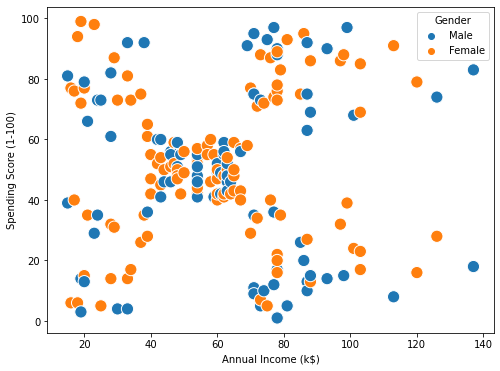

In [90]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=seg_cust, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender",s=150)

## Working of K-Means Algorithm
The following stages will help us understand how the K-Means clustering technique works-

Step 1: First, we need to provide the number of clusters, K, that need to be generated by this algorithm.

Step 2: Next, choose K data points at random and assign each to a cluster. Briefly, categorize the data based on the number of data points.

Step 3: The cluster centroids will now be computed.

Step 4: Iterate the steps below until we find the ideal centroid, which is the assigning of data points to clusters that do not vary.

4.1 The sum of squared distances between data points and centroids would be calculated first.

4.2 At this point, we need to allocate each data point to the cluster that is closest to the others (centroid).

4.3 Finally, compute the centroids for the clusters by averaging all of the cluster’s data points.

K-means implements the Expectation-Maximization strategy to solve the problem. The Expectation-step is used to assign data points to the nearest cluster, and the Maximization-step is used to compute the centroid of each cluster.

In [78]:
X=seg_cust[['Annual Income (k$)','Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [79]:
from sklearn.cluster import KMeans

In [80]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[88.2        17.11428571]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]
[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 0 2 4 2 0 2 0 2 4 2 0 2 0 2 0 2 0 2 4 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Text(0, 0.5, 'Spending Score (1-100)')

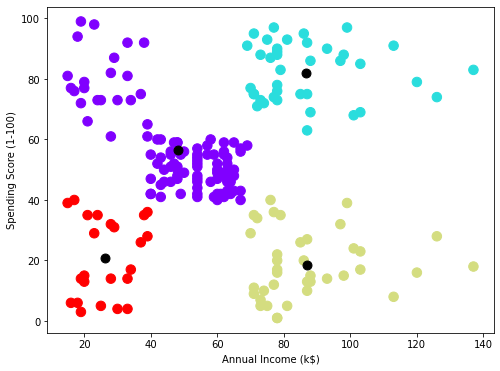

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(seg_cust['Annual Income (k$)'],seg_cust['Spending Score (1-100)'],c=kmeans.labels_,cmap='rainbow',s=90)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',s=80)
plt.xlabel('Annual Income (k$)',fontsize=10)
plt.ylabel('Spending Score (1-100)',fontsize=10)

In [82]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(seg_cust[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

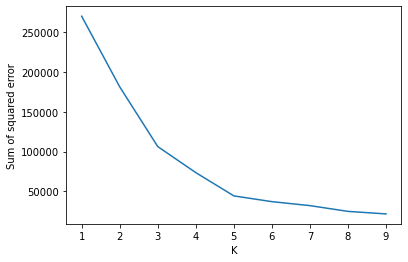

In [83]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [84]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[48.26       56.48      ]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [26.30434783 20.91304348]]
[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


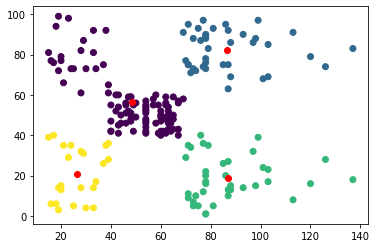

In [85]:
plt.scatter(seg_cust['Annual Income (k$)'],seg_cust['Spending Score (1-100)'],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='r')